# Organización de Datos (9558)

## Trabajo Práctico N° 2

#### Fecha: 2017-06-22

#### Integrantes:


#### Repo:
[Github - TP2](https://github.com/frisjon/tp2)

---
*tabla de contenidos*

---
#### Enunciado

El segundo TP es una competencia de Machine Learning en donde cada grupo debe intentar predecir la duración de los viajes en base a los datos de los mismos. La competencia se desarrolla en la plataforma de Kaggle, se provee un archivo "train.csv" que debe ser usado para entrenar un modelo de Machine Learning y un archivo "test.csv" que tiene los datos de los viajes a predecir. Adicionalmente pueden usarse los datos de las estaciones, del status de cada estación minuto a minuto y la información meteorológica.

ADVERTENCIA MUY IMPORTANTE: Dado que los datos son públicos los resultados de la competencia ya se saben, son parte de los datos del TP1, es fundamental que ningún grupo suba a Kaggle submissions que usan esta información ya que distorsiona el score de la competencia y una vez subido un submission es IMPOSIBLE ELIMINARLO. Los submissions
deben generarse en base a un modelo de machine learning y nunca en base a los resultados que ya se conocen.

TL;DR: NO SUBIR A KAGGLE SUBMISSIONS QUE HACEN TRAMPA, ES IMPOSIBLE BORRARLOS!!!

Los grupos deberán probar distintos algoritmos de Machine Learning para predecir la duración de los viajes en base a los datos de los mismos. A medida que los grupos realicen pruebas deben realizar el correspondiente submit en Kaggle para evaluar el resultado de los mismos. Al finalizar la competencia el grupo que mejor resultado tenga obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el examen por promoción o segundo recuperatorio.

Requisitos para la entrega del TP2:
1. El TP debe programarse en Python o R
- Debe entregarse una carpeta con el informe de algoritmos probados, algoritmo final utilizado, transformaciones realizadas a los datos, feature engineering, etc.
- El grupo debe presentar el TP en una computadora en la fecha indicada por la cátedra, el TP debe correr en un lapso de tiempo razonable (inferior a 1 hora) y generar un submission válido que iguale el mejor resultado obtenido por el grupo en Kaggle.

El TP2 se va a evaluar en función del siguiente criterio:
1. Cantidad de trabajo (esfuerzo) del grupo: ¿Probaron muchos algoritmos? ¿Hicieron un buen trabajo de pre-procesamiento de los datos y feature engineering?
- Resultado obtenido en Kaggle (obviamente cuanto mejor resultado mejor nota)
- Presentación final del informe, calidad de la redacción, uso de información obtenida en el TP1, conclusiones presentadas.
- Performance de la solución final.


ADVERTENCIA IMPORTANTE #2: Bajo ningún concepto debe interpretarse que es necesario finalizar el TP1 para poder comenzar el TP2, quienes incurran en este error se encontrarán que el tiempo necesario para desarrollar el TP2 es insuficiente. Es fundamental, imprescindible y vital comenzar el desarrollo del TP2 en forma paralela al TP1 para evitar problemas en el cumpimiento de las fechas de entrega.

---
#### [Descipción](https://inclass.kaggle.com/c/san-francisco-biking)

El propósito de esta competencia es predecir la duración de los viajes.

El objetivo de esta competencia es predecir la duración de los viajes de acuerdo a los datos de los mismos, la información meteorológica, etc.

Pueden usarse los siguientes archivos disponibles en:

https://www.kaggle.com/benhamner/sf-bay-area-bike-share

    .status
    .station 
    .weather

Para los viajes debe usarse el archivo train.csv provisto par entrenar el modelo y el archivo test.csv tiene los datos de los viajes a predecir.

IMPORTANTE: El archivo trips.csv del TP anterior tiene los resultados que queremos predecir, estos resultados NO DEBEN usarse de ninguna forma para el entrenamiento del modelo. No subir a Kaggle ningún submission que sea generado a partir de estos datos ya que afecta la evaluación de la competencia y NO ES POSIBLE ELIMINAR SUBMISSIONS. 

---
#### [Evaluación y Formato de Entrega](https://inclass.kaggle.com/c/san-francisco-biking/details/evaluation)

La evaluación es por Mean Squared Error es decir la diferencia de cuadrados entre la duración real del viaje y la duración que se predice mediante el modelo de Machine Learning usado.

El formato de submission es un archivo .csv de la forma:

    id,duration
    1,1
    8,8
    9,9 10
    10,10 9
    etc.

---
#### Conclusiones del TP 1

> Los usuarios del serivicio, en su mayoria, lo utiliza para trasladarse al trabajo.

> Ya conocemos cuáles son los datos a filtrar.

> ... (agregar mas)

---
#### Algunos comentarios sobre cosas en general (eliminar al terminar el tp)

Entender como se resuelve. Utilizamos perceptrones, etc?

Analizar los datos y determinar qué features son importantes.

Armar el modelo. (Cómo juntar los features)

Probar lo de cross validation, etc

---
Antes de seguir leyendo, podemos averiguar sobre cómo otras personas encaran este tipo de proyectos. Tal vez las preguntas se consteten de esa manera. 

[kernels de kaggle](https://www.kaggle.com/benhamner/sf-bay-area-bike-share/kernels)

[papers](https://drive.google.com/drive/u/0/folders/0B8rBD4QSqWnSRDRFUkVDSnVMMFk)

---
#### Introduciendo a la API

[Tensorflow](https://www.tensorflow.org/get_started/get_started)

>(En el link, hay explicaciones de las estructuras utilizadas en tensorflow.) -mk

>(Asumiendo que utilizamos tensorflow, podemos armar un modelo basico.) -mk

>##### Ejemplo de una parte del modelo

>Un dato entra, separamos las partes (o dimensiones) que consideramos importantes, realizamos cálculos con ellos y devolvemos un resultado.

>Una parte del algoritmo (un *nodo* en tensorflow), podría tomar como parámetros a las id's de las estaciones y devolver la distancia entre ellas. Luego la distancia, irá por otras partes del modelo que serán utilizadas para determinar el resultado final que es la duración del viaje.

>(Acá van las consideraciones de la api, (que estructuras de datos estan disponibles, como se pueden utilizar y como las VAMOS a utilizar). Despues en __plan__, ya juntamos todas las consideraciones y formamos el plan) -mk

[SciKit-Learn](http://scikit-learn.org/stable/index.html)

>Tiene muchas cosas implementadas.

---
#### Sets de Datos y Feature Engineering

En esta sección analizamos los datos a modo de preparación de armado del modelo.

Los sets de datos son:

>[Entrenamiento y testeo](https://inclass.kaggle.com/c/san-francisco-biking/data) ( https://inclass.kaggle.com/c/san-francisco-biking/data )

>[Set de datos del TP1](https://www.kaggle.com/benhamner/sf-bay-area-bike-share) ( https://www.kaggle.com/benhamner/sf-bay-area-bike-share )

In [1]:
# esto es solo para controlar los tiempos
import time
start = time.time()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Leemos los datos del set de entrenamiento
train = pd.read_csv('./data/train.csv', low_memory=False)

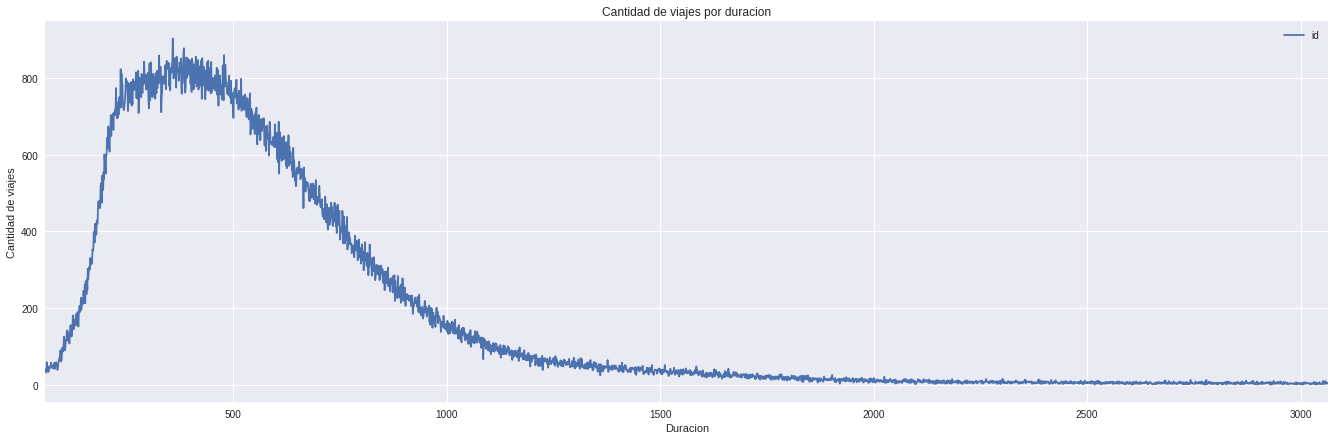

In [4]:
train[['id', 'duration']].groupby('duration').count().head(3000).plot(figsize=(23, 7));
plt.title('Cantidad de viajes por duracion');
plt.xlabel('Duracion');
plt.ylabel('Cantidad de viajes');

Del gráfico se observa que hay una gran cantidad de viajes de duración entre 200 y 600 segundos. (__Atención__: En el gráfico se muestran 3.000 de 14.614 duraciones diferentes)

---
##### Datos a filtrar

Para manejar y visualizar los datos, utilizamos *pandas*.

In [5]:
train = pd.read_csv('./data/train.csv', low_memory=False)

In [6]:
train.sample(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
464757,468364,222,9/24/2014 18:05,Townsend at 7th,65,9/24/2014 18:09,San Francisco Caltrain (Townsend at 4th),70,370,Subscriber,95054
458911,791116,511,6/2/2015 18:26,Steuart at Market,74,6/2/2015 18:34,2nd at Townsend,61,387,Subscriber,94107
32690,520825,513,10/29/2014 11:42,2nd at Folsom,62,10/29/2014 11:51,Powell at Post (Union Square),71,629,Subscriber,94107


Unas primeras observaciones son:

> Los nombres de las estaciones no son necesarios ya que se conocen sus identificaciones.
>
> El tipo de suscripción se puede convertir a un número. Además sólo hay dos tipos de suscripción.
>
> Las identificaciones de los viajes tampoco son necesarias ya que no aportan informacion útil.
>
> (Zip-code, creo se puede sacar)

In [7]:
# Cambiamos los nombres de los features, para que sea mas fácil de leer
nombres = {'subscription_type':  'sub_type',
           'start_station_name': 'ss_name',
           'end_station_name':   'es_name',
           'start_station_id':   'ss_id',
           'end_station_id':     'es_id',
           'start_date':         's_date',
           'end_date':           'e_date',
           'zip_code':           'z_code',
           'bike_id':            'b_id'}

train.rename(columns=nombres, inplace=True)

In [8]:
# Convertimos el formato de fecha
# El parametro 'format' hace que se ejecute un poco mas rápido
train.s_date = pd.to_datetime(train.s_date, format='%m/%d/%Y %H:%M')
train.e_date = pd.to_datetime(train.e_date, format='%m/%d/%Y %H:%M')

# Creamos una columna 'date' para poder hacer un merge con los datos del clima
train['date'] = pd.DatetimeIndex(train.s_date).normalize()

In [9]:
# Agregamos el dia de la semana
# 0: Lunes
# 1: Martes
# 2: Miercoles
# 3: Jueves
# 4: Viernes
# 5: Sabado
# 6: Domingo

train['s_day'] = train['s_date'].map(lambda x: x.weekday())
train['e_day'] = train['e_date'].map(lambda x: x.weekday())

In [10]:
# Convertimos las fechas a unix time
# En este paso convertimos a unix time, despues de pasarlo a formato datetime. creo que asi es mas rapido. probar
train.s_date = pd.DatetimeIndex(train.s_date).astype(np.int64) // 10**9
train.e_date = pd.DatetimeIndex(train.e_date).astype(np.int64) // 10**9

In [11]:
# Quitamos las columnas que no son necesarias
train.drop(['ss_name', 'es_name', 'z_code', 'id'], axis=1, inplace=True)

In [12]:
# Funcion para convertir el tipo de subscripcion
def sub_type(sub):
    if sub == 'Customer': return 1
    return 0

In [13]:
# Convertimos el tipo de subscripcion a valores numericos
train.sub_type = train.sub_type.map(sub_type)

#### Añadiendo información del clima y estaciones

En esta sección agregamos información respecto al clima y distancias entre estaciones.

##### Clima

In [14]:
# Leemos el set de weather
weather = pd.read_csv('./data/weather.csv')

In [15]:
nombres = {'mean_sea_level_pressure_inches': 'mean_press',
           'max_sea_level_pressure_inches': 'max_press',           
           'min_sea_level_pressure_inches': 'min_press',
           'precipitation_inches': 'precipitation',
           'mean_visibility_miles': 'mean_vis',
           'max_visibility_miles': 'max_vis',           
           'min_visibility_miles': 'min_vis',
           'mean_temperature_f': 'mean_temp_f',
           'max_temperature_f': 'max_temp_f',           
           'min_temperature_f': 'min_temp_f',           
           'mean_wind_speed_mph': 'mean_wind',
           'max_wind_Speed_mph': 'max_wind',           
           'max_gust_speed_mph': 'max_gust',
           'mean_dew_point_f': 'mean_dew_f',
           'max_dew_point_f': 'max_dew_f',           
           'min_dew_point_f': 'min_dew_f',
           'wind_dir_degrees': 'wind_dir',
           'mean_humidity': 'mean_hum',
           'max_humidity': 'max_hum',           
           'min_humidity': 'min_hum',
           'zip_code': 'z_code',
           'events': 'event'}

weather.rename(columns=nombres, inplace=True)
weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')

In [16]:
# Quitamos los features que no consideramos importantes
drop = ['max_temp_f', 'min_temp_f', 'max_dew_f', 'min_dew_f', 'max_hum', 'min_hum', 'max_press', 'min_press', 'max_vis', 'min_vis', 'max_wind', 'max_gust', 'z_code']
weather.drop(drop, axis=1, inplace=True)

In [17]:
# Funcion para clasificar estaciones climaticas.
def estacion(date):
    if date.month >= 3 and date.month <= 5:    return 1
    elif date.month >= 6 and date.month <= 8:  return 2
    elif date.month >= 9 and date.month <= 11: return 3
    else:                                      return 4

In [18]:
# Determinamos la estacion del año
# 1: Primavera
# 2: Verano
# 3: Otoño
# 4: Invierno

weather['season'] = weather['date'].map(estacion)

In [19]:
# Funcion para convertir eventos
def events(event):
    eventos = ['fog', 'rain', 'fog-rain', 'rain-thunderstorm', 'nan']
    for i in range(len(eventos)):
        if event.lower() == eventos[i]: return i

In [20]:
# Convertimos los eventos del dia a valores numericos
# 0: Fog
# 1: Rain
# 2: Fog-Rain
# 3: Rain-Thunderstorm
# 4: No Event

weather['event'] = weather['event'].fillna("nan")
weather['event'] = weather['event'].map(events)

In [21]:
# Convertimos las precipitaciones
weather['precipitation'] = weather['precipitation'].map(lambda x: 0.0 if x == 'T' else float(x))

In [22]:
# Juntamos los datos de train y weather
datos = pd.merge(train, weather, how='right', on='date')

In [23]:
# Quitamos la columna 'date' que fue necesaria solamente para juntar con 'weather'
datos.drop('date', axis=1, inplace=True)

##### Distancias

In [24]:
stations = pd.read_csv('./data/station.csv', low_memory=False)
stations.drop(['name','installation_date'], axis=1, inplace=True)

In [25]:
# Funcion para calcular distancia euclidea sobre la proyecicon de coordenadas geograficas en un plano
from math import cos,sqrt,pi
def dist(a, b):
    ''' https://en.wikipedia.org/wiki/Geographical_distance#Spherical_Earth_projected_to_a_plane '''
    p = pi / 180
    x = (a[0] * p, a[1] * p)
    y = (b[0] * p, b[1] * p)
    f_m = (x[0] + y[0]) / 2
    d_lat = x[0] - y[0]
    d_lon = x[1] - y[1]
    return sqrt((d_lat)**2 + (cos(f_m) * d_lon)**2)*1000

In [26]:
# Creamos un dataframe de distancias
distancias = pd.DataFrame(columns=('ss_id','es_id','dist'))

for i in stations.values:
    for j in stations.values:
        distancias = distancias.append(pd.DataFrame({'ss_id':[i[0]],
                                                     'es_id':[j[0]],
                                                     'dist':[dist((i[1],i[2]),(j[1],j[2]))]}))

In [27]:
# Juntamos las distancias y los viajes
datos = datos.merge(distancias, how='left', on=['ss_id','es_id'])

In [28]:
# Convertimos los id de estaciones a numeros enteros
# (habia problemas mas adelante sin no hacemos esto. no se por que)
datos['ss_id'] = datos['ss_id'].values.astype(np.int64)
datos['es_id'] = datos['es_id'].values.astype(np.int64)

In [29]:
datos.sample(3)

,duration,s_date,ss_id,e_date,es_id,b_id,sub_type,s_day,e_day,mean_temp_f,...,mean_hum,mean_press,mean_vis,mean_wind,precipitation,cloud_cover,event,wind_dir,season,dist
2048060,502,1425921000,45,1425921480,70,325,0,0,0,57.0,...,82.0,30.01,9.0,6.0,0.0,5.0,4,268.0,1,0.325086
1694090,261,1423730940,74,1423731180,49,613,0,3,3,58.0,...,68.0,30.16,10.0,2.0,0.0,3.0,4,281.0,4,0.085013
1288014,434,1425023940,59,1425024360,77,624,0,4,4,56.0,...,74.0,29.87,10.0,13.0,0.0,3.0,4,288.0,4,0.284917


In [30]:
# (Aca saco los NaN. Esta parte se puede mejorar(? )

print datos.shape

# Quitamos los NaN
datos.dropna(inplace=True)
print datos.shape

(2749805, 21)
(2704934, 21)


#### Por ahora vemos los datos reducidos porque son demasiados

In [31]:
# Selecionamos 10.000 elementos al azar. Solo para hacer visualizaciones rapidas
df = datos.sample(10000).dropna(thresh=2)

In [32]:
# Realizamos algunos plots
def plots_sobre_datos():
    plots = ['s_date', 'ss_id', 'es_id', 'b_id', 's_day', 'e_day', 'mean_temp_f', 'mean_dew_f', 'mean_hum', 'mean_press', 'mean_vis', 'mean_wind', 'precipitation', 'cloud_cover', 'event', 'season', 'dist']
    fig = plt.figure(figsize=(50, 50))

    for i in range(len(plots)-1):
        ax = fig.add_subplot(6, 3, i+1)
        plt.title(plots[i].replace('_', ' ').title());
        ax.scatter(df[plots[i]], df['duration']);
    plt.show()

Con más datos incluidos, podemos hacer una reducción de dimensiones y visualizar el set de datos.

##### SVD

In [33]:
def sklearn_svd():
    from sklearn.decomposition import TruncatedSVD

    df_train = train.drop('date', axis=1)

    svd = TruncatedSVD(n_components=2, n_iter=7)
    X = svd.fit_transform(df.values)
    Y = svd.fit_transform(df_train.values)

    fig = plt.figure(figsize=(50, 10));
    ax = fig.add_subplot(1, 2, 1);
    plt.title('Con datos de clima y estaciones')
    ax.scatter(X[:, 0], X[:, 1]);

    ax = fig.add_subplot(1, 2, 2);
    plt.title('Sin datos de clima y estaciones')
    ax.scatter(Y[:, 0], Y[:, 1]);
    plt.show()

Se puede observar una especie de relación lineal.

(Pero a mi me parece muy raro. Igualmente, la aproximacion de la SVD a 2 dimensiones reduce lo mejor posible los datos originales (a 2 dimensiones, por el teorema de Eckert-Young). Por lo tanto, esta es la mejor representacion en 2D de los datos (segun la *norma de Frobenius*)) [p.315 apunte]

##### PCA

(Primero habria que hacer la matriz de distancias entre los datos, y  luego reducir con PCA !!!)

(Y tambien falta comparar PCA "con y sin" los datos agregados)

In [34]:
def sklearn_pca():
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X = pca.fit_transform(df.values)
    plt.scatter(X[:, 0], X[:, 1]);

---
#### Modelo

Finalmente, luego de realizar las consideraciones, en esta sección armamos el modelo que resuelva el problema de predicción.

*plan*

---
#### Ejecución del modelo

*Pruebas*

linear model de sklearn (copy-paste)

In [35]:
data = datos
num = int(data.shape[0]*.2)

In [36]:
def sk_learn_regresion_lineal():
    # Lo dejo como funcion para poder correr lo de los datos sin tener que ejecutar esta parte
    from sklearn import linear_model

    x = data.dist.values
    x = x.reshape(-1, 1)
    y = data.duration.values

    x_train = x[:-num]
    x_test = x[-num:]

    y_train = y[:-num]
    y_test = y[-num:]

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    print 'Coefficients:', regr.coef_
    print "Mean squared error: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2)
    print 'Variance score: %.2f' % regr.score(x_test, y_test)

    plt.figure(figsize=(20, 10))

    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, regr.predict(x_test), color='blue', linewidth=3)

    plt.show()

# Si quieren ver el grafico, descomenten la siguiente linea
#sk_learn_regresion_lineal()

Segun los comentarios en el ejemplo de sklearn, si *Variance score* es 1, la prediccion es perfecta. Acá es 0 :C

Naive Bayes
http://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

In [37]:
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression

In [38]:
data = datos

In [39]:
a = data.dist.values
b = data.duration.values 
X = np.column_stack((a,b))
X.shape

(2704934, 2)

In [40]:
np.random.seed(0)
n_samples, n_features = X.shape[0], X.shape[1]
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

In [41]:
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/home/mk/p2env/lib/python2.7/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


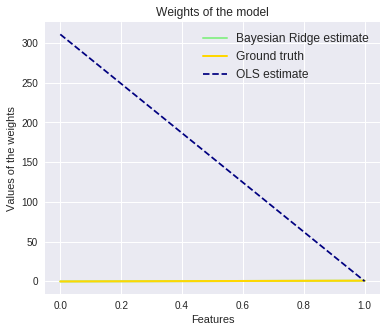

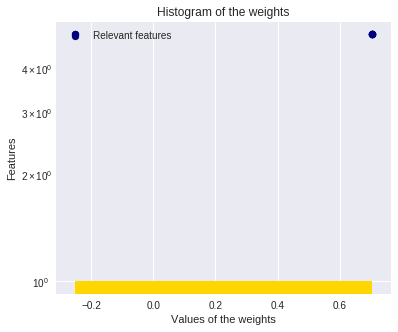

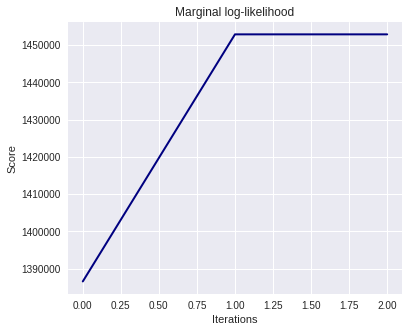

In [42]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True)
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

In [43]:
# Esto es solo para controlar los tiempos
end = time.time()
print end-start

40.2160310745


(Lo de arriba es regresion lineal (entre "distancias entre estaciones" y "duracion"). Se puede continuar haciendo regresion lineal __multivariable__ (cada feature contra duracion), pero nose si aplicar regresion __lineal__ esta bien (puede ser cuadratica, etc), aunque viendo los plots, mas o menos los datos se comportan de manera lineal (visto en la __SVD__). Despues tambien nos podemos fijar con otros algoritmos de regresion. No me queda muy en claro, como evaluar los algoritmos. Tambien faltaria dividir el set de datos en: "entrenamiento" y "validacion")

(el set de "test", es para la "entrega" final. Entonces por eso hay que dividir el set de "train". La proporcion entre tamaños (del set de entrenamiento y el de validacion) se calibra despues. Pero debe hacerse para "penalizar" a los algoritmos)

#### Regresion lineal a las piñas

(faltan tildes. Esta redaccion es para nosotros, no para la entrega)

Entendiendo poco de las implementaciones hechas en sk-learn, tomemos un camino diferente. Implementemos nosotros mismos un algoritmo de regresion para entender mejor como funciona. 

Investigando un poco en internet, se nota que aparece mucho las palabras *Gradient Descent*. Segun tengo entendido, este algoritmo, primero realiza una estimacion de como se ajustan los datos, y luego, en iteraciones siguientes de a poco re-ajusta su estimacion, minimizando asi el error entre, valga la redundancia, su __estimacion__ y los __datos__.

Veamos a que nos referimos con la __estimacion__. Por ejemplo, dados datos en 2 dimensiones, se quiere poder determinar una funcion que lleve datos de "una dimension" a la otra. Esta funcion puede ser lineal, cuadratica, cubica, exponencial, etc. Lo imporante en entender bien a qué es a lo que se quiere llegar, predecir/estimar. (Nota: la forma de la funcion, claramente depende de cómo se distribuyen los datos. Hay funciones que "ajustan" mejor que otras)

Hay un tema bastante importante del cual pareciera que se lo mencionara sin mucha importancia. Esto es, __El Error__. Cómo podemos determinar que tan bien ajusta nuestra funcion a la prediccion de los datos? Aqui es donde entra este metodo para calificar las predicciones. [wikipedia](https://en.wikipedia.org/wiki/Errors_and_residuals)
En el TP se pide que se utilize el [ECM](https://en.wikipedia.org/wiki/Mean_squared_error).

Ahora que sabemos como calificar a las predicciones del algoritmo vemos al algoritmo en sí. (Un poco raro el orden)

Supongamos que tenemos datos en 2D y que se comportan de manera lineal. Esto quiere decir que podemos modelar los datos con una funcion lineal. La formula de una recta es:

> f(x) = m * x + b

Aquí, "x" seran los datos de "una dimension", y f(x) seran las predicciones hechas por la funcion. Lo que queda por averiguar son entonces los parametros "m" y "b", la pendiente y ordenada al origen respectivamente.

El procedimiento que se discutió al principio consistia en que, se iteraba sobre los datos, dándoselos a la función produciendo una prediccion y luego la calificamos. Despues de eso, segun la calificacion, modificamos los parametros "m" y "b" con esperanzas de que las proximas predicciones den un ECM mas bajo (ie. que la diferencia entre el valor real y la prediccion sea cada vez menor)

---

##### Manos a la obra

Primero tenemos que hacer las siguientes consideraciones:

> Cómo iterar sobre los datos? 

> Cómo calificar a la prediccion? Esto ya lo determinamos. Debemos implementar una funcion ECM.

> Cómo modificar a los parámetros de la funcion? También hay que determinar cómo se ven afectados por el ECM. (__o__)

> Cómo van a interactuar los datos que tenemos con la funcion? (__oo__)

> (__o__) A esto, creo que se lo llama *learning rate*.

> (__oo__) Acá, como debemos predecir duracion de un viaje, f(x) debe ser la predicción de duracion. Ademas, el dato x, no debe ser el resto de los datos que tenemos. Es decir, __NO__ son esos vectores multidimensionales que quedaron fuera, sino que es solo __UN__ dato, aunque, este proceso lo podemos repetir para cada dimension/feature. (espero que se entienda :P )

Nota: vamos a aplicar un modelo de prediccion lineal, porque con los plots individuales, se vio que, tenia pinta de ser lineal, ponele. Además, la SVD, y esto sí tiene que estar bien, reducia los datos de forma parecida (a una linea). Esto me lleva a decir que un modelo lineal no está tan mal. De todas formas, podemos luego intentar otros modelos.

Nota de la Nota: los plots de arriba son una parte de todos los datos, asi que puede que yo halla flasheado cualquiera!!

Con respecto las iteraciones, vamos a ir agarrando samples del set de datos (o sea un vector de tamaño k, menor al set de datos entero), se lo aplicamos a la funcion, que nos devuelve otro vector, y luego calculamos el ECM para modificar a la siguiente iteracion.

> __x__   ->   f(__x__) = __ _y__ (la prediccion)

> ECM(__ _y__, __y__) -> (modificamos m y b)


In [44]:
# Definimos la funcion de prediccion
def f(x, m, b):
    return x*m+b

# Definimos el ECM que es la media de los cuadrados de los errores
def ecm(_y, y):
    '''_y: prediccion
        y: valor real de la duracion
        g: guess
        r: real value
    '''
    return sum((g-r)**2 for g,r in zip(_y, y))

In [45]:
# Esto lo hice porque la mayoria de las implementaciones en sklearn lo hace esta forma
#No me salio bien. Abajo esta mas claro

#NUM = .2
#Y_train = df.duration.values[:-int(df.shape[0]*NUM)]
#Y_test = df.duration.values[-int(df.shape[0]*NUM):]
#X_train = df.dist.values[:-int(df.shape[0]*NUM)]
#X_test = df.dist.values[-int(df.shape[0]*NUM):]

In [46]:
# Datos de entrenamiento
#La 1er columna son las "x", y la 2da columna son las "y"
#Este set de datos se puede partir en entrenamiento y validacion
W = df[['dist','duration']].values

In [47]:
from random import random, randint

In [48]:
def a():
    if randint(0,1) == 0: return .3
    return random()

In [86]:
b=0
m=1

# k: es solamente un valor para no entrenar con todos los datos de W
# recuerden que los datos que agarramos son 10.000 de los datos originales.
# solo para que no sea tan largo.

sign = [-1,1]
data = []

for o in range(1):
    k=0
    data.append([])
    error_act = 0
    error_prev = 0
    guesses = []
    reals = []
    m=1
    for x,y in W:
        k+=1
        _y = f(x, m, b)
        guesses.append(_y)
        reals.append(y)
        error_act = ecm(guesses, reals)
        if error_prev < error_act: 
            m *= 1/random()
        else: 
            m *= 13
        data[o].append(error_act)
        error_prev = error_act
        if k > 200: break

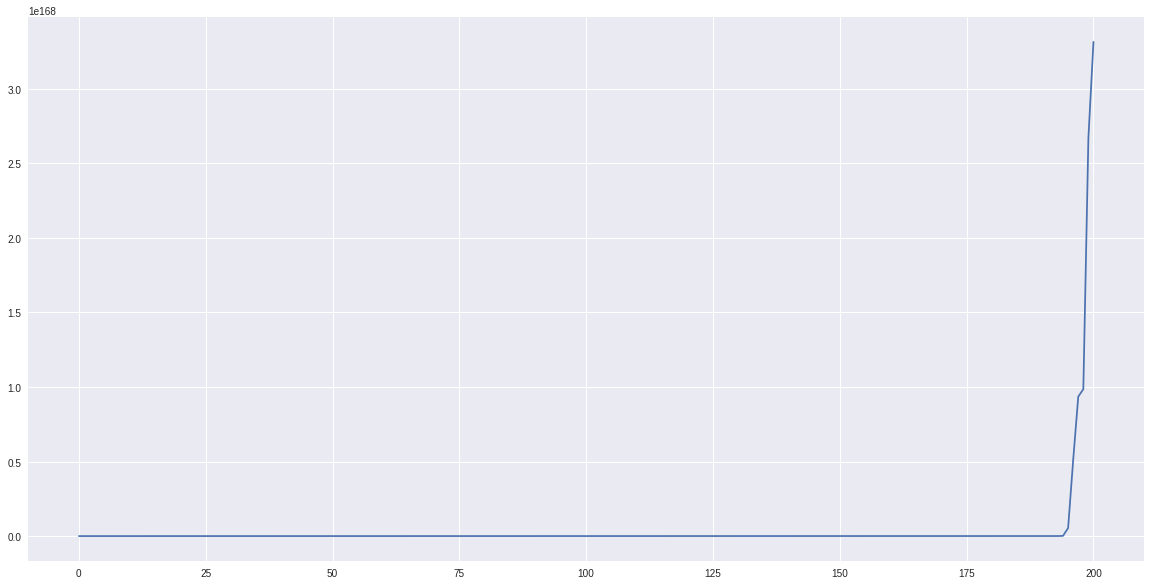

In [87]:
plt.figure(figsize=(20, 10));
for i in range(len(data)):
    plt.plot(data[i]);